In [1]:
import networkx as nx
import os 
import json
import sys
import matplotlib.pyplot as plt
sys.path.append('../../utils/')
from utils import load_json, export_json

Importando arquivos contendo usuários e seus amigos

In [2]:
path = '../../data/users_data/'

brazilian_users_first_level_friends = load_json(path + "brazilian_users_first_level_friends.json")
brazilian_users_second_level_friends = load_json(path + "brazilian_users_second_level_friends.json")

Agregando usuários e preparando para construção do Grafo

In [3]:
# Une os objetos JSON
unified_dict = {**brazilian_users_first_level_friends, **brazilian_users_second_level_friends}

print(unified_dict.keys())

print("Total de usuários: ", len(unified_dict.keys()))

dict_keys(['/user/1berto_goulart', '/user/31mike', '/user/APalo', '/user/AXMachado79', '/user/AbelJr', '/user/Acrcampos', '/user/Adriannns', '/user/Aester', '/user/AffonsoMoro', '/user/Agatz', '/user/Agulha', '/user/Aheller', '/user/AleixaBatista', '/user/Alex74', '/user/Alexandre-Matos', '/user/AlexandreSS', '/user/AlexandreSiano', '/user/Alexandre_Hyppolito', '/user/AlineToledo', '/user/Alineamedeiros', '/user/Allan102392', '/user/Altrunox', '/user/Am3lia', '/user/AndersonBiro', '/user/Anderson_Zanin', '/user/AndreMartins', '/user/AndrePaiva', '/user/AndreSelonke', '/user/AndreSiphon', '/user/Andre_Barreiro', '/user/Andre_moroka', '/user/Andreatta35', '/user/AntonioLopes', '/user/AraujoLC', '/user/ArthurFadir', '/user/ArthurMarino', '/user/Atipica', '/user/AtlasForgiven', '/user/BSiqueira', '/user/BarbaraRudge', '/user/Barbarabreus', '/user/BeerXp', '/user/Beer_Explorer2019', '/user/Benihana_AU', '/user/BenoitLuft', '/user/BergBaldansi', '/user/BernardoKnopp', '/user/BernardoMota', '

Construindo grafo

In [4]:
G=nx.Graph()

nos_grafo = unified_dict.keys() 

# Adicionando nós do grafo a partir da lista de usuários unificados
G.add_nodes_from(nos_grafo)

# Incluindo relações de usuários no grafo, ou seja, as arestas, para usuários que temos a informação de seus amigos
for key, value in unified_dict.items():
    for item in value:
        if item in unified_dict.keys():
            G.add_edge(key,item)

print("Número de nós: ", G.number_of_nodes())
print("Número de arestas: ", G.number_of_edges())

Número de nós:  3795
Número de arestas:  21043


Exportando grafo para visualização e manipulação no software Gephi(https://gephi.org/)

In [5]:
nx.write_gexf(G, "grafo.gexf")

Assortatividade do grafo + coeficiente de Pearson

In [6]:
assortatividade = nx.degree_assortativity_coefficient(G)
print("Assortatividade do grafo:", assortatividade)

Assortatividade do grafo: -0.08349695653940027


In [7]:
coeficiente_pearson = nx.degree_pearson_correlation_coefficient(G)
print("Coeficiente de Pearson do grafo:", coeficiente_pearson)

Coeficiente de Pearson do grafo: -0.08349695653940385


Distribuição do grau dos nós

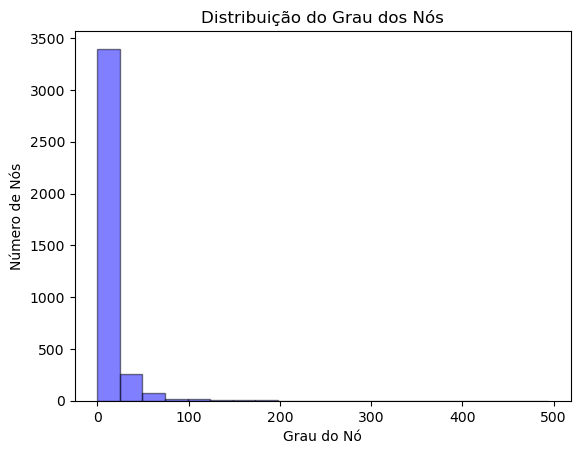

In [8]:
# Calcule a distribuição do grau
grau = [d for n, d in G.degree()]

# Plote a distribuição do grau
plt.hist(grau, bins=20, alpha=0.5, color='b', edgecolor='black')
plt.xlabel('Grau do Nó')
plt.ylabel('Número de Nós')
plt.title('Distribuição do Grau dos Nós')
plt.show()

Distribuição do tamanho dos componentes

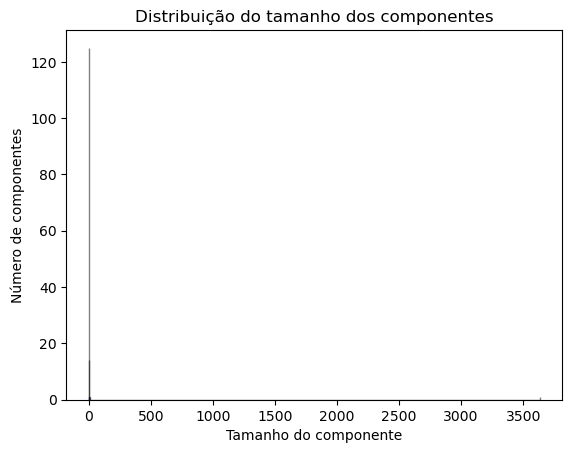

In [9]:

# Calcule os componentes conexos
componentes_conexos = list(nx.connected_components(G))

# Calcule o tamanho de cada componente
tam_componentes = [len(component) for component in componentes_conexos]

# Plote a distribuição do tamanho das componentes
plt.hist(tam_componentes, bins=range(1, max(tam_componentes) + 1), alpha=0.5, color='b', edgecolor='black')
plt.xlabel('Tamanho do componente')
plt.ylabel('Número de componentes')
plt.title('Distribuição do tamanho dos componentes')
plt.show()

Número de componentes do grafo

In [10]:
componentes = nx.number_connected_components(G)
print("Número de componentes:", componentes)

Número de componentes: 142
